In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = "/resources/ANZ_Internship/Task2_Clean_Anz_data.csv"
df = pd.read_csv(path)

In [2]:
%%capture
! pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df.head()

,account,age,gender,salary
0,ACC-1037050564,40,0,46388.68
1,ACC-1056639002,22,0,76680.24
2,ACC-1199531521,52,1,106001.84
3,ACC-1217063613,27,0,38908.96
4,ACC-1222300524,38,0,52110.76


In [4]:
df.corr() #As we can see the correlation between age and salary is very close to 0, which means not a strong relastionship

,age,gender,salary
age,1.000000,0.055487,-0.036504
gender,0.055487,1.000000,0.018394
salary,-0.036504,0.018394,1.000000


In [5]:
df_ts2 = df[['age','gender','salary']] 

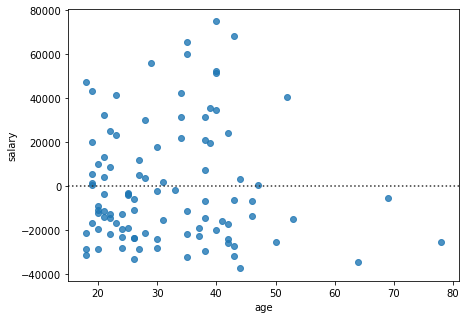

In [6]:
width = 7
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x = 'age', y = 'salary', data = df_ts2)
plt.show()
#Residual plot shows that a simple linear regression might not be a good fit, a non-linear regression is more appropriate for this data.

In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df_ts2[['age']]
Y = df_ts2['salary']

In [8]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
yhat = lm.predict(X)
yhat[0:2]

array([66361.30751011, 67896.15524013])

In [10]:
from sklearn.metrics import mean_squared_error
print("The R^2 score is:", lm.score(X,Y))
print("The MSE score is:",mean_squared_error(df['salary'],yhat))
#The R^2 is too small, and the MSE is too big, which means a simple linear regression model is not a good fit for this dataset

The R^2 score is: 0.0013325350120698687
The MSE score is: 718943545.1756822


Try Polynomial Regression

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [59]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree = 10, include_bias=False)), ('model',LinearRegression())]

In [60]:
pipe = Pipeline(Input)

In [61]:
pipe.fit(X,Y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=10, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [63]:
yhat2 = pipe.predict(X)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


<AxesSubplot:xlabel='salary'>

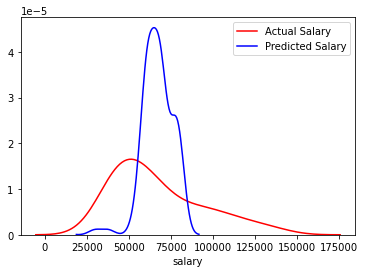

In [64]:
ax1 = sns.distplot(df_ts2['salary'], hist = False, color = "r", label = "Actual Salary")
sns.distplot(yhat2,hist = False, color = "b", label = "Predicted Salary")
#Polynomial regression dose not seem good as well

<AxesSubplot:xlabel='salary'>

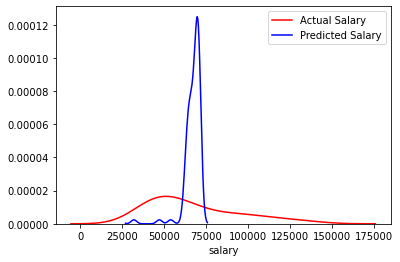

In [69]:
ax1 = sns.distplot(df_ts2['salary'], hist = False, color = "r", label = "Actual Salary")
sns.distplot(yhat,hist = False, color = "b", label = "Predicted Salary")
#This is the simple linear regression prediction compare to actual salary

In [71]:
print("By using the polynomial regression, the R^2 score is:", pipe.score(X,Y))
print("By using the polynomial regression, the MSE score is:",mean_squared_error(df['salary'],yhat2))

By using the polynomial regression, the R^2 score is: 0.10491927174987214
By using the polynomial regression, the MSE score is: 644371159.1168696


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [ ]:
#There is no distinct correaltion between age and salary, more data is needed to make a prediction. 